In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
#Read in the data
df = pd.read_excel("C:/Users/User/OneDrive/Documents/Chow_research/FDI_Report/World Trade Report 2025 table 1 on FDI.xlsx", skiprows=2)  # Skip first 2 rows

# Define ASEAN-10 countries (excluding Timor) from the sheet data
asean10_countries = [
    'Singapore',
    'Malaysia',
    'Indonesia',
    'Viet Nam',
    'Thailand',
    'Philippines',
    'Brunei Darussalam',
    'Cambodia',
    "Lao People's Democratic Republic",
    'Myanmar'
]

# Define other selected countries
other_countries = ['China','Singapore','Malaysia', 'Indonesia','Viet Nam','Thailand','Philippines','World']
# Extract data for ASEAN-10 countries and sum for 2018 and 2024
asean10_df = df[df['Region/economy'].isin(asean10_countries)][['2018', '2024']]
asean10_sum = asean10_df.sum().to_frame().T
asean10_sum.insert(0, 'Region/economy', 'ASEAN10')

# Extract data for other selected countries
other_df = df[df['Region/economy'].isin(other_countries)][['Region/economy', '2018', '2024']]

# Combine into one final DataFrame
fdi_selected = pd.concat([other_df, asean10_sum], ignore_index=True)

# Calculate relative share (FDI / World FDI)
world_2018 = fdi_selected.loc[fdi_selected['Region/economy'] == 'World', '2018'].values[0]
world_2024 = fdi_selected.loc[fdi_selected['Region/economy'] == 'World', '2024'].values[0]

fdi_selected['2018_RS'] = fdi_selected['2018'] / world_2018 *100
fdi_selected['2024_RS'] = fdi_selected['2024'] / world_2024 *100

# Save the DataFrame to an Excel file
fdi_selected.to_excel("C:/Users/User/OneDrive/Documents/Chow_research/FDI_Report/FDI_report.xlsx", index=False)

# Display the result
print(fdi_selected)

  Region/economy          2018          2024     2018_RS     2024_RS
0          World  1.294205e+06  1.508803e+06  100.000000  100.000000
1          China  1.383059e+05  1.162377e+05   10.686548    7.703966
2      Indonesia  2.056347e+04  2.421226e+04    1.588888    1.604733
3       Malaysia  7.618338e+03  1.125892e+04    0.588650    0.746215
4    Philippines  6.602460e+03  8.938096e+03    0.510155    0.592396
5      Singapore  7.441279e+04  1.433522e+05    5.749689    9.501056
6       Thailand  1.170538e+04  1.057983e+04    0.904445    0.701207
7       Viet Nam  1.550000e+04  2.017000e+04    1.197646    1.336821
8        ASEAN10  1.443823e+05  2.250156e+05   11.156058   14.913514


In [ ]:
# Remove 'World' row for plotting
fdi_plot = fdi_selected[fdi_selected['Region/economy'] != 'World'].copy()

# Set country/region as index
fdi_plot.set_index('Region/economy', inplace=True)

# Plot stacked bar chart for relative shares
ax = fdi_plot[['2018_RS', '2024_RS']].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))

# Add correct percentage labels on top of each bar segment
for container in ax.containers:
    labels = [f'{v:.2f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.title('FDI Relative Share by Region (2018 vs 2024)')
plt.ylabel('Relative Share of Global FDI')
plt.xlabel('Region/Economy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


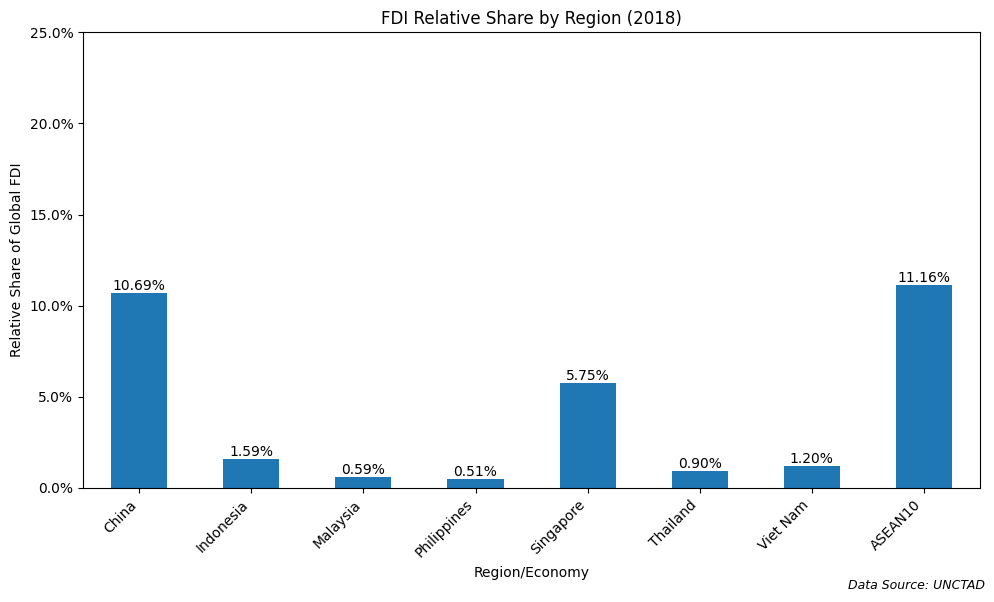

In [7]:

# Remove 'World' row for plotting
fdi_plot = fdi_selected[fdi_selected['Region/economy'] != 'World'].copy()

# Set country/region as index
fdi_plot.set_index('Region/economy', inplace=True)

# Plot only 2018_RS bar chart
ax = fdi_plot[['2018_RS']].plot(
    kind="bar",
    figsize=(10, 6),
    color='#1f77b4',
    legend=False
)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_ylim(0, 25)  # ✅ Set y-axis limits from 0% to 25%

# Add percentage labels on top of bars
for container in ax.containers:
    labels = [f'{v:.2f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.title('FDI Relative Share by Region (2018)')
plt.ylabel('Relative Share of Global FDI')
plt.xlabel('Region/Economy')
plt.xticks(rotation=45, ha='right')

# Add data source label
plt.figtext(0.99, 0.01, "Data Source: UNCTAD", horizontalalignment='right', fontsize=9, style='italic')

plt.tight_layout()
plt.show()

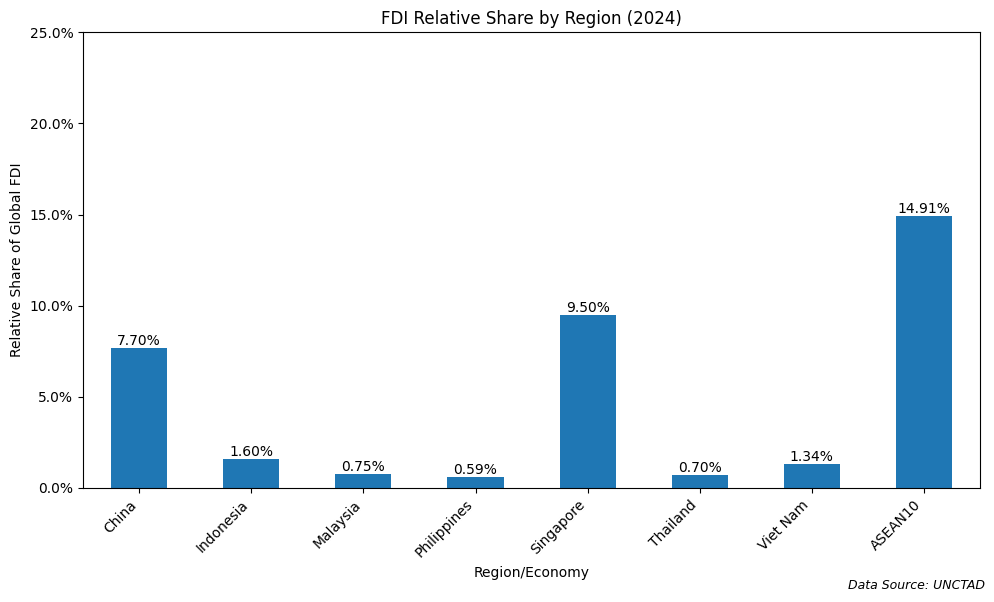

In [6]:

# Remove 'World' row for plotting
fdi_plot = fdi_selected[fdi_selected['Region/economy'] != 'World'].copy()

# Set country/region as index
fdi_plot.set_index('Region/economy', inplace=True)

# Plot only 2024_RS bar chart
ax = fdi_plot[['2024_RS']].plot(
    kind="bar",
    figsize=(10, 6),
    color='#1f77b4',
    legend=False
)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_ylim(0, 25)  # ✅ Set y-axis limits from 0% to 25%

# Add percentage labels on top of bars
for container in ax.containers:
    labels = [f'{v:.2f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.title('FDI Relative Share by Region (2024)')
plt.ylabel('Relative Share of Global FDI')
plt.xlabel('Region/Economy')
plt.xticks(rotation=45, ha='right')

# Add data source label
plt.figtext(0.99, 0.01, "Data Source: UNCTAD", horizontalalignment='right', fontsize=9, style='italic')

plt.tight_layout()
plt.show()